In [1]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [70]:
X = pd.read_csv('AAPL_quarterly_financials.csv')


In [71]:
X.index = X.name

In [72]:
X = pd.DataFrame(X.loc['BasicEPS', :]).iloc[2:, :]

X.index = pd.to_datetime(X.index)

In [74]:
X = X.sort_index().fillna(0.)

In [75]:
X = X.loc['2004-03-31':]

In [76]:
y = X.copy()

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [12]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [13]:
from pytrends.request import TrendReq

In [161]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
#keywords = ['New Product', 'Layoffs', 'Employee Layoff', 'Holiday Sale', "Workers pay", 'Semiconductor', 'apple', 'iphone', 'App']
keywords = ["iPhone", "IOS", "Apple", "Mac", "Operating System", "App", "Water", "Banana", "Jump"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [162]:
df = df.resample("Q").mean()

In [163]:
df = df.loc[:'2023-09-30']

In [171]:
df

,iPhone,IOS,Apple,Mac,Operating System,App,Water,Banana,Jump
date,,,,,,,,,
2004-03-31,0.000000,1.000000,20.000000,76.666667,99.333333,2.000000,61.000000,36.000000,48.000000
2004-06-30,0.000000,1.666667,19.000000,71.333333,83.000000,1.333333,68.333333,37.333333,44.000000
2004-09-30,0.000000,1.333333,23.000000,70.000000,87.666667,1.333333,68.333333,37.000000,47.666667
2004-12-31,0.000000,1.000000,24.333333,75.000000,76.666667,2.000000,59.000000,43.000000,47.333333
2005-03-31,0.000000,1.000000,27.000000,76.666667,75.000000,1.666667,70.000000,40.666667,49.666667
...,...,...,...,...,...,...,...,...,...
2022-09-30,53.000000,19.333333,51.000000,42.666667,38.333333,80.333333,91.666667,63.333333,44.666667
2022-12-31,50.000000,16.000000,51.333333,46.000000,39.000000,76.666667,82.000000,59.333333,43.666667
2023-03-31,48.666667,13.333333,43.333333,43.000000,36.666667,78.000000,89.333333,63.333333,45.000000


# 2.) Normalize all the X data

In [120]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

In [165]:
X_scaled = scaler.fit_transform(df)

# 3.)  Import data. Train, Test, Holdout (80%,15%,5%)

In [123]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [89]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

In [167]:
lasso = Lasso(alpha = 0.5)

In [168]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.5)

In [175]:
coefficients = lasso.coef_
intercept = lasso.intercept_
print(coefficients)

[ 0.  0.  0. -0. -0.  0.  0.  0. -0.]


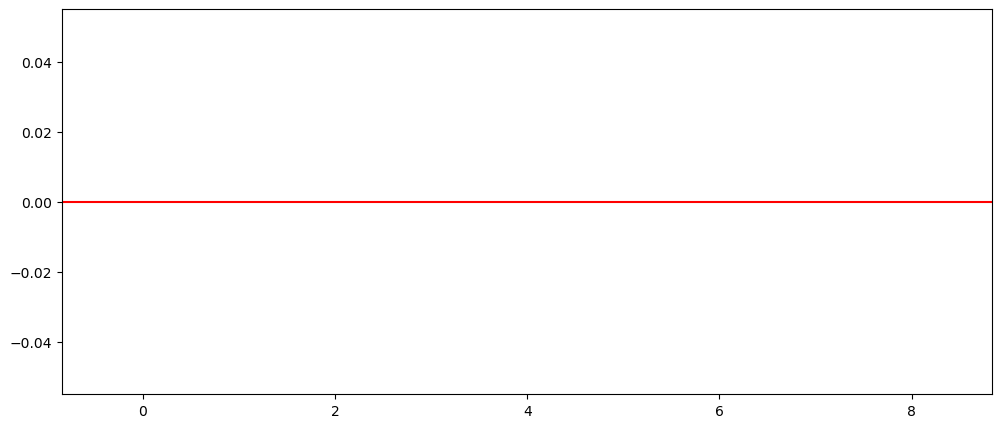

In [177]:
plt.figure(figsize = (12,5))
categories = ['New Product', 'Layoffs', 'Employee Layoff', 'Holiday Sale', "Workers pay", 'Semiconductor', 'apple', 'iphone', 'App']
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

All of the coefficients are varying degrees of zero. All the coeffiencets shrunk to zero indicating that there was no relationship between them and the stock price of Apple. This does make sense in the grand scheme of things most of these headlines bight not be related to Apple and the movement of their share price.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?